<a href="https://colab.research.google.com/github/shekharkhandelwal1983/DS_ML_Model/blob/master/DS_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install pyforest

  Created wheel for pyforest: filename=pyforest-0.1.4-py2.py3-none-any.whl size=9606 sha256=699d38be46072516706f7ecffcace7877cc151c5d6e323aeb05a9fa8dfacc186
  Stored in directory: /root/.cache/pip/wheels/b5/6f/28/9dd3fc38ca88e9c30712fc6c61aa83dca4dc496c82136c38f2
Successfully built pyforest


In [0]:
from pyforest import *

In [0]:
from google.colab import files

In [12]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [0]:
df=pd.read_csv("heart.csv")

In [14]:
df.head()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease,Unnamed: 14
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2,NaN
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1,NaN
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2,NaN
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1,NaN
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1,NaN


Titanic Case study

In [0]:
df = pd.read_csv("https://query.data.world/s/gb5wjsz5c76sgfyeas22h4loq7syqt")

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
(df.isnull().sum()/df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [26]:
df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df["Fare"].quantile(.75)

31.0

In [29]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [0]:
df_new=df[df["Sex"]=="female"]

In [35]:
df_new.Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [36]:
233/891

0.2615039281705948

In [37]:
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [38]:
pd.crosstab(df.Survived, df.Sex, normalize=True)

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df["Age_group"]=pd.cut(df.Age, bins=[0,16,32, 48, 64, 200], labels=[0,1,2,3,4])

In [47]:
sns.countplot("Age_group", hue="Survived", data=df)

In [0]:
#missing value imputer

In [49]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1


In [0]:
# drop columns that are not needed for modelling
df.drop(["Age_group","PassengerId","Ticket"], axis=1, inplace=True)

In [52]:
df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,NaN,S


In [0]:
df.drop("Name", inplace=True, axis=1)

In [54]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.25,NaN,S


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [56]:
100*(df.isnull().sum()/df.shape[0])

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [57]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
# Imputing embarked with S as it is present max times - mode imputation

In [0]:
df["Embarked"]=df["Embarked"].fillna("S")

In [60]:
100*(df.isnull().sum()/df.shape[0])

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.000000
dtype: float64

In [61]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [62]:
df.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
C22 C26        3
              ..
C62 C64        1
B30            1
E50            1
B37            1
E46            1
Name: Cabin, Length: 147, dtype: int64

In [0]:
df.drop("Cabin", axis=1, inplace=True)

In [64]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [0]:
# use iterative imputer to impute age
# needs all the column in numerical format


In [0]:
#using replace method
df["Sex"].replace(["female","male"],[0,1], inplace=True)

In [66]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,S


In [0]:
#using Label encoder
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [0]:
df["Embarked"]=le.fit_transform(df["Embarked"])

In [69]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
from fancyimpute import IterativeImputer

In [0]:
#lets preserve the column names as fancy imputer will result in a numpy array
df_cols=df.columns

In [72]:
df_cols

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [73]:
IterativeImputer().fit_transform(df)

array([[ 0.    ,  3.    ,  1.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ...,  0.    , 71.2833,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 0.    ,  3.    ,  0.    , ...,  2.    , 23.45  ,  2.    ],
       [ 1.    ,  1.    ,  1.    , ...,  0.    , 30.    ,  0.    ],
       [ 0.    ,  3.    ,  1.    , ...,  0.    ,  7.75  ,  1.    ]])

In [0]:
df_clean = pd.DataFrame(IterativeImputer().fit_transform(df))

In [75]:
df_clean.head(1)

,0,1,2,3,4,5,6,7
0,0.0,3.0,1.0,22.0,1.0,0.0,7.25,2.0


In [0]:
#replace column names
df_clean.columns=df_cols

In [77]:
df_clean.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.25,2.0


In [79]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,2


In [81]:
100*(df_clean.isnull().sum()/df_clean.shape[0])

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [0]:
# Iterative imputer converts everything to float
#convert datatype to integer for -  
for i in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']:
  df_clean[i]=pd.to_numeric(df_clean[i])
  df_clean[i]=df_clean.astype(int)

In [83]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,0,22.0,0,0,7.2500,0
1,1,1,1,38.0,1,1,71.2833,1
2,1,1,1,26.0,1,1,7.9250,1
3,1,1,1,35.0,1,1,53.1000,1
4,0,0,0,35.0,0,0,8.0500,0


In [84]:
df_clean["Age"].describe()

count    891.000000
mean      29.267291
std       13.699411
min       -4.850393
25%       21.000000
50%       28.574185
75%       36.483583
max       80.000000
Name: Age, dtype: float64

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

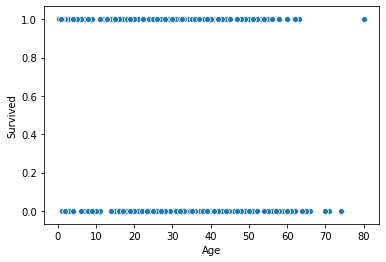

In [98]:
sns.scatterplot(x="Age", y="Survived", data=df_clean)
plt.show()

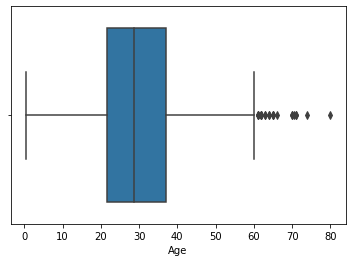

In [99]:
sns.boxplot(df_clean["Age"])

In [0]:
df_clean.drop(df.index[df_clean.Age<0], inplace=True)

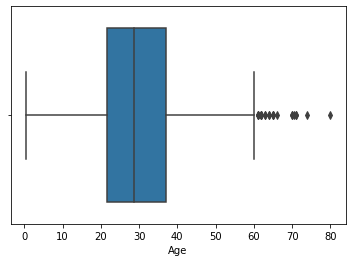

In [103]:
sns.boxplot(df_clean["Age"])

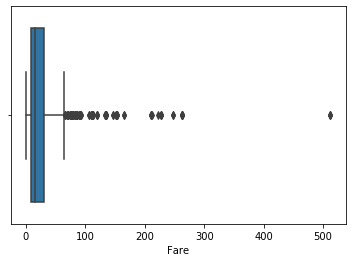

In [104]:
# outliers in Fare column
sns.boxplot(df_clean["Fare"])

In [106]:
df_clean[df_clean["Fare"]>100].count()

Survived    53
Pclass      53
Sex         53
Age         53
SibSp       53
Parch       53
Fare        53
Embarked    53
dtype: int64

In [107]:
df_clean.shape

(884, 8)

In [108]:
df_clean[df_clean["Fare"]>300].count()

Survived    3
Pclass      3
Sex         3
Age         3
SibSp       3
Parch       3
Fare        3
Embarked    3
dtype: int64

In [0]:
df_clean.drop(df_clean.index[df_clean["Fare"]>300], inplace=True)

In [110]:
df_clean.shape

(881, 8)

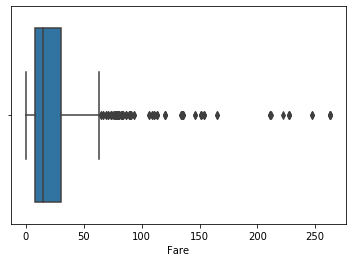

In [111]:
sns.boxplot(df_clean["Fare"])